In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [22]:
all_data = pd.read_csv (r'C:\Users\blync\Downloads\sub-data.csv')
all_data

C:\Users\blync\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CASEID,YEAR,AGE,HHSEX,EDCL,EDUC,FAMSTRUCT,HOUSECL,KIDS,MARRIED,...,PIRMORT,PIRTOTAL,DEBT2INC,LEVRATIO,INCOME,INCCAT,NETWORTH,FOODHOME,FOODDELV,FOODAWAY
0,1,1989,35,2,2,8,1,2,4,2,...,0.0,0.2760,0.157,0.410,9737.17,1,2201.71,0.0,0.0,0.0
1,2,1989,35,2,2,8,1,2,4,2,...,0.0,0.2760,0.136,0.355,9737.17,1,2406.96,0.0,0.0,0.0
2,3,1989,35,2,2,8,1,2,4,2,...,0.0,0.2760,0.174,0.455,9737.17,1,2033.79,0.0,0.0,0.0
3,4,1989,35,2,2,8,1,2,4,2,...,0.0,0.2760,0.172,0.450,9737.17,1,2052.45,0.0,0.0,0.0
4,5,1989,35,2,2,8,1,2,4,2,...,0.0,0.2760,0.151,0.395,9737.17,1,2257.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238875,238876,2016,29,1,3,9,4,2,1,1,...,0.0,0.0494,0.748,0.172,21265.36,1,76700.00,6000.0,0.0,720.0
238876,238877,2016,29,1,3,9,4,2,1,1,...,0.0,0.0494,0.748,0.172,21265.36,1,76700.00,6000.0,0.0,720.0
238877,238878,2016,29,1,3,9,4,2,1,1,...,0.0,0.0494,0.748,0.172,21265.36,1,76700.00,6000.0,0.0,720.0
238878,238879,2016,29,1,3,9,4,2,1,1,...,0.0,0.0494,0.748,0.174,21265.36,1,75600.00,6000.0,0.0,720.0


In [24]:
all_data.columns

Index(['CASEID', 'YEAR', 'AGE', 'HHSEX', 'EDCL', 'EDUC', 'FAMSTRUCT',
       'HOUSECL', 'KIDS', 'MARRIED', 'LIFECL', 'LF', 'EXPENSHILO', 'ASSET',
       'ASSETCAT', 'FIN', 'CHECKING', 'SAVING', 'STOCKS', 'BOND', 'HOUSES',
       'EQUITY', 'HSTOCKS', 'NSTOCKS', 'OWN', 'NOWN', 'LEASE', 'NLEASE',
       'NVEHIC', 'NEWCAR1', 'NEWCAR2', 'DEBT', 'CCBAL', 'EDN_INST', 'VEH_INST',
       'PIRMORT', 'PIRTOTAL', 'DEBT2INC', 'LEVRATIO', 'INCOME', 'INCCAT',
       'NETWORTH', 'FOODHOME', 'FOODDELV', 'FOODAWAY'],
      dtype='object')

## Looking at the 2016 data collected, can you develop a model that can predict with some certainty the ration of a persons savings : assests based solely on their age?

In [52]:
selected_data = all_data[['YEAR', 'AGE', 'ASSET', 'CHECKING', 'SAVING', 'STOCKS', 'BOND', 'HOUSES']]

In [53]:
selected_data2 = selected_data.loc[selected_data['YEAR'] == 2016]

In [54]:
selected_data2['CHECKING2ASSETS'] = selected_data2['CHECKING']/selected_data2['ASSET']
selected_data2['SAVING2ASSETS'] = selected_data2['SAVING']/selected_data2['ASSET']
selected_data2['STOCKS2ASSETS'] = selected_data2['STOCKS']/selected_data2['ASSET']
selected_data2['BOND2ASSETS'] = selected_data2['BOND']/selected_data2['ASSET']
selected_data2['HOUSES2ASSETS'] = selected_data2['HOUSES']/selected_data2['ASSET']

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [55]:
selected_data2

,YEAR,AGE,ASSET,CHECKING,SAVING,STOCKS,BOND,HOUSES,CHECKING2ASSETS,SAVING2ASSETS,STOCKS2ASSETS,BOND2ASSETS,HOUSES2ASSETS
207640,2016,71,177100.0,300.0,0.0,0.0,0.0,150000.0,0.001694,0.0,0.0,0.0,0.846979
207641,2016,71,177200.0,300.0,0.0,0.0,0.0,150000.0,0.001693,0.0,0.0,0.0,0.846501
207642,2016,71,177100.0,300.0,0.0,0.0,0.0,150000.0,0.001694,0.0,0.0,0.0,0.846979
207643,2016,71,177100.0,300.0,0.0,0.0,0.0,150000.0,0.001694,0.0,0.0,0.0,0.846979
207644,2016,71,177200.0,300.0,0.0,0.0,0.0,150000.0,0.001693,0.0,0.0,0.0,0.846501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238875,2016,29,92600.0,1300.0,0.0,0.0,0.0,0.0,0.014039,0.0,0.0,0.0,0.000000
238876,2016,29,92600.0,1300.0,0.0,0.0,0.0,0.0,0.014039,0.0,0.0,0.0,0.000000
238877,2016,29,92600.0,1300.0,0.0,0.0,0.0,0.0,0.014039,0.0,0.0,0.0,0.000000
238878,2016,29,91500.0,1300.0,0.0,0.0,0.0,0.0,0.014208,0.0,0.0,0.0,0.000000


In [56]:
selected_data2.AGE.describe()

count    31240.000000
mean        52.703585
std         16.214756
min         18.000000
25%         40.000000
50%         54.000000
75%         64.000000
max         95.000000
Name: AGE, dtype: float64

In [68]:
selected_data3 = selected_data2.groupby(['AGE']).mean()
selected_data3 = selected_data3.reset_index()
selected_data3

,AGE,YEAR,ASSET,CHECKING,SAVING,STOCKS,BOND,HOUSES,CHECKING2ASSETS,SAVING2ASSETS,STOCKS2ASSETS,BOND2ASSETS,HOUSES2ASSETS
0,18,2016,5.050000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1,19,2016,5.382991e+05,561.153846,1287.692308,4.294308e+04,0.000000e+00,1.248462e+05,0.017185,0.124862,0.073660,0.000000,0.087705
2,20,2016,4.129968e+04,1088.975000,12104.416667,0.000000e+00,0.000000e+00,0.000000e+00,0.260121,0.151250,0.000000,0.000000,0.000000
3,21,2016,9.400191e+03,542.365217,1105.913043,0.000000e+00,0.000000e+00,2.608696e+02,0.122271,0.111266,0.000000,0.000000,0.012221
4,22,2016,3.993632e+05,2454.947368,2908.947368,2.044737e+04,0.000000e+00,1.458947e+04,0.214021,0.136714,0.021310,0.000000,0.084749
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,91,2016,5.330656e+07,28842.666667,20417.777778,2.838061e+07,2.777778e+05,1.598933e+06,0.012473,0.020411,0.160188,0.002908,0.296335
74,92,2016,1.650331e+06,22549.000000,7231.600000,4.750000e+04,1.612000e+05,3.799000e+05,0.226377,0.030439,0.029051,0.030858,0.344736
75,93,2016,1.331401e+07,86966.666667,1205.000000,2.306867e+06,1.216167e+06,7.014333e+05,0.004877,0.000545,0.066408,0.058084,0.154535
76,94,2016,1.172533e+06,34666.666667,34666.666667,0.000000e+00,1.366667e+04,4.061333e+05,0.017002,0.139316,0.000000,0.075298,0.391682


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 

In [83]:
X = selected_data3['AGE']
Y = selected_data3['SAVING2ASSETS']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

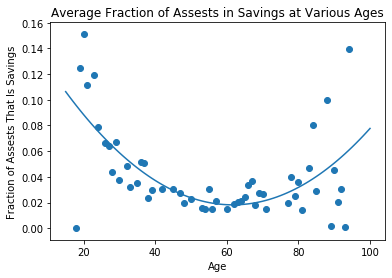

In [119]:
x = np.linspace(15, 100, 86)
fit = np.polyfit(X_train, y_train, 2)
p = np.poly1d(fit)
plt.plot(x, p(x))
plt.scatter(X_train, y_train)
plt.xlabel('Age')
plt.ylabel('Fraction of Assests That Is Savings')
plt.title('Average Fraction of Assests in Savings at Various Ages')
correlation = np.corrcoef(X_train, y_train)[0,1]

In [122]:
y_pred = p(X_test)
diff = y_test - y_pred

In [128]:
print("Mean absolute error: %.4f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

Mean absolute error: 0.0116
Residual sum of squares (MSE): 0.0004
R2-score: 0.44


## Develop a model for the average value of millenials' (under 35 in this data set) houses based on age.  Feel free to remove outliers if they exist.

Text(0.5, 1.0, 'Average Value of House Purchased by Millenials')

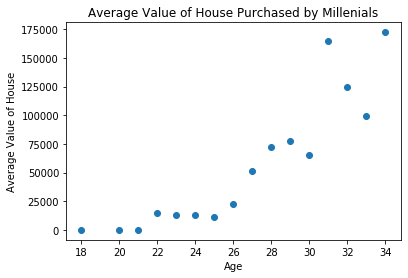

In [162]:
selected_data4 = selected_data3.loc[selected_data3['AGE'] < 35] 
selected_data5 = selected_data4.loc[selected_data4['AGE']!= 19]
a = selected_data5['AGE']
b = selected_data5['HOUSES']
plt.scatter(a,b)
plt.xlabel('Age')
plt.ylabel('Average Value of House')
plt.title('Average Value of House Purchased by Millenials')

In [209]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(lambda j,k,l,m: k*j**2 + l*j + m, a, b)

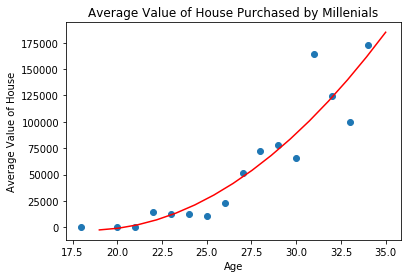

In [220]:
plt.scatter(a,b)
plt.xlabel('Age')
plt.ylabel('Average Value of House')
plt.title('Average Value of House Purchased by Millenials')
x = np.linspace(19, 35, 16)
linfit = popt[0]*x**2 + popt[1]*x+popt[2]
plt.plot(x, linfit, color='red')

In [221]:
print("R2-score: %.2f" % r2_score(b, linfit) )

R2-score: 0.83
